<h1 style="color:DarkBlue; font-weight:bold; font-size:28px; text-align:center;">
    Linear Regression in Python 📊
</h1>


## 📌 Table of Contents  

### 🔷 I. [Data Analysis](#0)  

### 🔷 II. [Simple Linear Regression](#1)  
- 🔹 [1. Performing OLS Regression with `statsmodels`](#2)  
- 🔹 [2. Gradient Descent](#3)  
- 🔹 [3. Manual Method](#4)  
- 🔹 [4. `SciPy` Implementation](#5)  
- 🔹 [5. `Scikit-Learn` Implementation](#6)  

### 🔷 III. [Multiple Linear Regression](#7)  
- 🔹 [1. Feature Normalization](#8)  
- 🔹 [2. Gradient Descent Implementation](#9)  
- 🔹 [3. `Scikit-Learn` Implementation](#10)  
- 🔹 [4. `SciPy` Implementation](#11)  
- 🔹 [5. `statsmodels` Implementation](#12)  
- 🔹 [5. `statsmodels` Implementation](#12)  


### <span style="color:#00008B;">📚 Imports Library</span>

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn import linear_model
regr = linear_model.LinearRegression()

### <span style="color:#00008B;">🏡 Loading our housing dataset</span>

In [6]:
dataset = pd.read_csv(r"C:\Users\lenovo\OneDrive\Desktop\DATA SCIENCE\github\Machine learning\1- Linear regression\House_Pricing.csv")


In [7]:
# We want to be able to predict Y which is our price variable
Y = dataset[['price']]

In [8]:
X = dataset.drop(['price', 'id', 'date'],  axis=1)

<a id='0'></a>
## <span style="color:orangered;"><i>I. Data Analysis</i></span> 
[Top](#top)


In [10]:
# By utilizing pandas .info(), we observe that the dataset comprises 18 columns and 21,613 records. 
# Nearly all the provided features are already in numeric format.

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
dtypes: flo

In [11]:
#list our columns 
columns = X.columns
columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [12]:
#show first 3 records
X.head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


#### <font color="Darkblue">**Understanding `X.describe()` in Pandas**</font>

The `X.describe()` function in pandas provides a **statistical summary** of numerical columns in the dataset. It helps to understand key statistics such as:

- **Count**: The number of non-null values.
- **Mean**: The average of the values.
- **Standard Deviation (`std`)**: The measure of spread in the data.
- **Min and Max**: The smallest and largest values.
- **Percentiles (`25%`, `50%`, `75%`)**: Useful for understanding data distribdescribe()


In [14]:
X.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### <font color="Darkblue">**Computing Correlation Between Variables**</font>
To analyze the relationship between features in our dataset, we compute the **Pearson correlation coefficient** after removing unnecessary columns.xis=1)


In [16]:
dataset = dataset.drop(['id', 'date'], axis=1)

In [17]:
dataset.corr(method='pearson')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,0.036392,0.667463,0.605566,0.323837,0.053982,0.126442,-0.053168,0.306919,0.021571,0.585374,0.082456
bedrooms,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667463,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


#### <font color="Darkblue">**Visualizing the Above Table**</font>

We can also represent the table above visually to gain better insights.


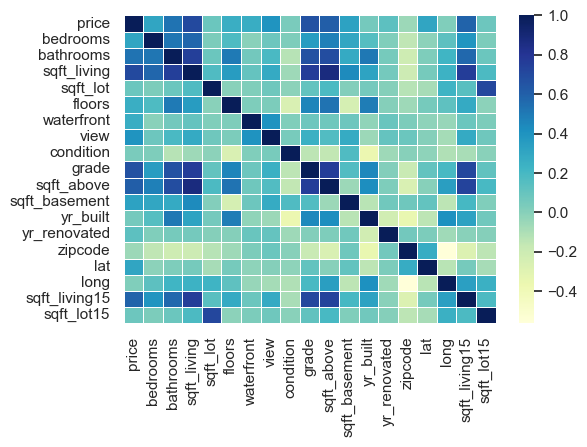

In [19]:
# Set Seaborn style to "pastel"
sns.set(style="white", palette="pastel")

# Create a figure with a defined size
plt.figure(figsize=(6,4))

# Generate a heatmap with a pastel colormap
sns.heatmap(dataset.corr(), annot=False, cmap="YlGnBu", linewidths=0.5)

# Show the plot
plt.show()

#### <font color="Darkblue">**Using `statsmodels` for Regression Analysis**</font>

The `statsmodels` package provides valuable insights and statistical summaries, including **p-values**, to help evaluate the significance of variables in a regression model.

When performing **Simple Linear Regression**, we analyze a single independent variable, whereas **Multiple Linear Regression** considers multiple variables. To identify the most significant predictors, we can use **Step Wise Regression**, which includes techniques like **Forward Selection** and **Backward Elimination**.


In [21]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


#### <font color="Darkblue">**Performing OLS Regression with `statsmodels`**</font>

In this code, we use the `statsmodels` package to perform **Ordinary Least Squares (OLS) Regression**, which helps in identifying statistically significant predictors.



In [23]:
import statsmodels.api as sml
from statsmodels import tools

X_new = tools.add_constant(X)

regressor_OLS = sml.OLS(endog = Y,exog =  X_new).fit()

regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2961.
Date:                Sun, 02 Mar 2025   Prob (F-statistic):               0.00
Time:                        16:21:04   Log-Likelihood:            -2.9462e+05
No. Observations:               21613   AIC:                         5.893e+05
Df Residuals:                   21595   BIC:                         5.894e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.677e+06   2.93e+06      2.276      0.023    9.27e+05    1.24e+07
bedrooms       -3.58e+04   1893.037    -18.910      0.000   -3.95e+04   -3.21e+04
bathrooms      4.117e+04   3255.732     12.644      0.000    3.48e+04    4.75e+04
sqft_living     110.5096      2.271     48.661      0.000     106.058     114.961
sqft_lot          0.1284      0.048      2.678      0.007       0.034       0.222
floors         6695.1575   3598.129      1.861      0.063    -357.441    1.37e+04
waterfront      5.83e+05   1.74e+04     33.563      0.000    5.49e+05    6.17e+05
view           5.293e+04   2141.405     24.719      0.000    4.87e+04    5.71e+04
condition      2.641e+04   2352.946     11.225      0.000    2.18e+04     3.1e+04
grade          9.599e+04   2154.148     44.559      0.000    9.18e+04       1e+05
sqft_above       70.8314      2.255     31.416      0.000      66.412      75.251
sqft_basement    39.6910      2.648     14.987      0.000      34.500      44.882
yr_built      -2622.4105     72.705    -36.069      0.000   -2764.918   -2479.903
yr_renovated     19.8242      3.658      5.420      0.000      12.654      26.994
zipcode        -582.5717     33.007    -17.650      0.000    -647.267    -517.876
lat            6.028e+05   1.07e+04     56.121      0.000    5.82e+05    6.24e+05
long           -2.15e+05   1.31e+04    -16.357      0.000   -2.41e+05   -1.89e+05
sqft_living15    21.6758      3.450      6.283      0.000      14.914      28.438
sqft_lot15       -0.3825      0.073     -5.217      0.000      -0.526      -0.239
==============================================================================
Omnibus:                    18359.449   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1856934.171
Skew:                           3.560   Prob(JB):                         0.00
Kurtosis:                      47.848   Cond. No.                     3.83e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.49e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<a id='6'></a>
## <span style="color:orangered;"><i>II. Simple Linear Regression</i></span>   
[Top](#top)




We begin with **Simple Linear Regression** because it provides a straightforward way to understand relationships between variables before progressing to **Multiple Linear Regression**. While the fundamental concepts are similar, simple regression is easier to visualize and interpret.

In **Simple Linear Regression**, we analyze the relationship between a **single independent variable** and a **dependent variable**. Here, we will use **`sqft_living`** as our independent variable **`x`**.

Our objective is to estimate **ŷ** using the eq : $\hat{y} = x {\theta_1} + \theta_0$, where $\theta_1$ is our coefficient and $\theta_0$ is our `Y` intercept. To estimate $\hat{y}$ we need to find a function such as $\hat{y} = h(x) = x {\theta_1} + \theta_0$ relationship.


In [26]:
x = X[['sqft_living']]
y = Y

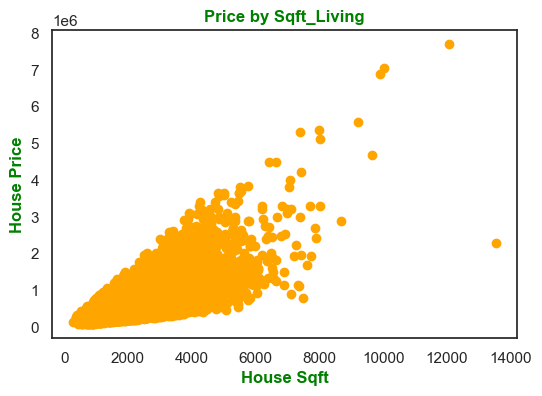

In [27]:
plt.figure(figsize=(6,4))

plt.xlabel('House Sqft', fontsize=12, fontweight='bold', color='green')
plt.ylabel('House Price', fontsize=12, fontweight='bold', color='green')
plt.title('Price by Sqft_Living', fontsize=12, fontweight='bold', color='green')

plt.scatter(x, y, marker='o', color='orange')

plt.show()


<a id='2'></a>
#### <font color="Darkblue">**1. Performing OLS Regression with `statsmodels`**</font> 
#### Using `seaborn.regplot()` and `scipy.stats`


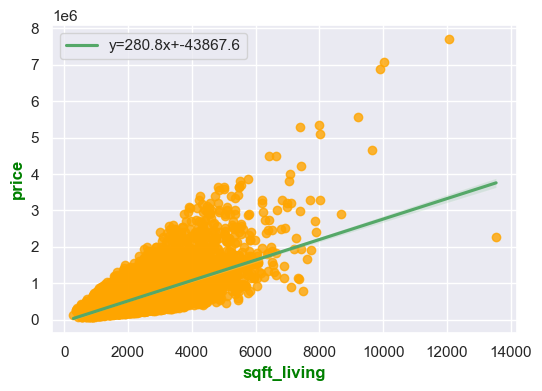

In [29]:
from scipy import stats  # Import stats module from scipy
sns.set(color_codes=True)

slope, intercept, r_value, p_value, std_err = stats.linregress(dataset['sqft_living'], dataset['price'])

f = plt.figure(figsize=(6,4))
data = dataset[['price', 'sqft_living']]
ax = sns.regplot(x='sqft_living', y='price', data=data, 
                 scatter_kws={"color": "Orange"}, 
                 line_kws={'color': 'g', 'label': "y={0:.1f}x+{1:.1f}".format(slope, intercept)})

# Set x-axis and y-axis labels to green
ax.set_xlabel("sqft_living", color="green", fontsize=12, fontweight='bold')
ax.set_ylabel("price", color="green", fontsize=12, fontweight='bold')

ax.legend()
plt.show()



In [30]:
print(slope, intercept)

280.8066899295006 -43867.60153385543


In [31]:
print(std_err)

1.9376149902337942


<a id='3'></a>
#### <font color="Darkblue">**2. Gradient Descent**</font> 
Fit the linear regression parameters $\theta$ to the dataset using gradient descent

#### 2.1 Update Equations

The hypothesis of linear regression is:

$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

The objective of linear regression is to minimize the cost function (Root Mean Square Error RMSE):

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2 $$

To minimize the cost of $J(\theta)$ we will use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update

$$ \theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} $$ 

(simultaneously update $\theta_j$ for all $j$). With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost $J(\theta)$.


In [33]:
x = X[['sqft_living']]
y = Y

In [34]:
xg = x.values.reshape(-1,1)
yg = y.values.reshape(-1,1)
xg = np.concatenate((np.ones(len(x)).reshape(-1,1), x), axis=1)

#### 2.2 Implementing the Cost Function $J(\theta)$ in python

In [36]:
def computeCost(x, y, theta):
    m = len(y)
    h_x = x.dot(theta)
    j = np.sum(np.square(h_x - y)) / (2 * m)  # Fixed cost computation
    return j

In [37]:
def gradientDescent(x, y, theta, alpha, iteration):
    print('Running Gradient Descent...')
    j_hist = []
    m = len(y)

    for i in range(iteration):
        h_x = x.dot(theta)
        theta = theta - ((alpha / m) * (np.dot(x.T, (h_x - y))))
        j_hist.append(computeCost(x, y, theta))  # Append cost after update
        
        # Debugging print
        if i % 100 == 0:
            print(f"Iteration {i}: Cost={j_hist[-1]}, theta={theta.T}")

    return theta, j_hist

In [38]:
# Initialize Parameters
theta = np.zeros((2,1))
iteration = 2000
alpha = 0.001

# Feature Scaling (Normalize xg to prevent overflow)
xg = (xg - np.mean(xg, axis=0)) / np.std(xg, axis=0)

theta, cost = gradientDescent(xg, yg, theta, alpha, iteration)
print('Theta found by Gradient Descent: slope = {} and intercept {}'.format(theta[1], theta[0]))

Running Gradient Descent...
Iteration 0: Cost=nan, theta=[[nan nan]]
Iteration 100: Cost=nan, theta=[[nan nan]]


C:\Users\lenovo\AppData\Local\Temp\ipykernel_33772\3216883476.py:7: RuntimeWarning: invalid value encountered in divide
  xg = (xg - np.mean(xg, axis=0)) / np.std(xg, axis=0)


Iteration 200: Cost=nan, theta=[[nan nan]]
Iteration 300: Cost=nan, theta=[[nan nan]]
Iteration 400: Cost=nan, theta=[[nan nan]]
Iteration 500: Cost=nan, theta=[[nan nan]]
Iteration 600: Cost=nan, theta=[[nan nan]]
Iteration 700: Cost=nan, theta=[[nan nan]]
Iteration 800: Cost=nan, theta=[[nan nan]]
Iteration 900: Cost=nan, theta=[[nan nan]]
Iteration 1000: Cost=nan, theta=[[nan nan]]
Iteration 1100: Cost=nan, theta=[[nan nan]]
Iteration 1200: Cost=nan, theta=[[nan nan]]
Iteration 1300: Cost=nan, theta=[[nan nan]]
Iteration 1400: Cost=nan, theta=[[nan nan]]
Iteration 1500: Cost=nan, theta=[[nan nan]]
Iteration 1600: Cost=nan, theta=[[nan nan]]
Iteration 1700: Cost=nan, theta=[[nan nan]]
Iteration 1800: Cost=nan, theta=[[nan nan]]
Iteration 1900: Cost=nan, theta=[[nan nan]]
Theta found by Gradient Descent: slope = [nan] and intercept [nan]


#### 2.3  Gradient Descent
Gradient descent is a generic optimization algorithm that measures the local gradient of the cost function with regards to the parameter $\theta$ and goes in the direction of descending gradient.

Algorithm:

repeat until convergence:
$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial\theta_j}J(\theta_0, \theta_1) = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} $$ 

where $j=0,1$; $\alpha$ is the learning rate (the steps to update J); $\frac{\partial}{\partial\theta_j}J(\theta_0, \theta_1)$ is a derivative.

* Learning rate to small: slow gradient descent
* Learning rate to large: gradient descent can overshoot the minimum, may fail to converge

#### 2.4 Plot the linear fit:

In [41]:
theta.shape

(2, 1)

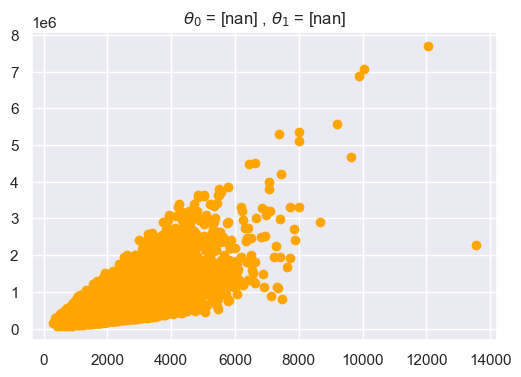

In [42]:
plt.figure(figsize=(6,4))
plt.title('$\\theta_0$ = {} , $\\theta_1$ = {}'.format(theta[0], theta[1]))
plt.scatter(x,y, marker='o', color='Orange')
plt.plot(x,np.dot(x.values, theta.T))
plt.show()

Text(0, 0.5, 'Cost')

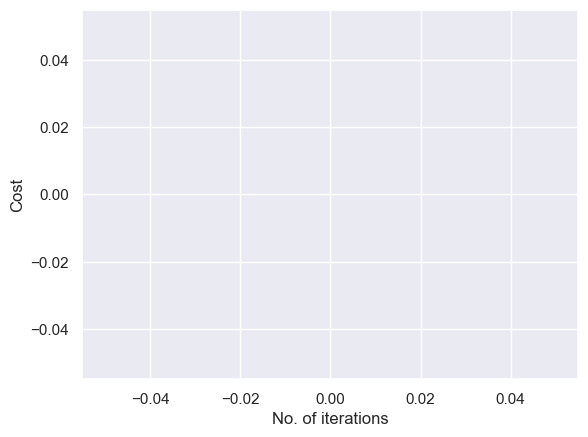

In [43]:
plt.plot(cost)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')

<a id='4'></a>
#### <font color="Darkblue">**3. Manual Method: Compute Slope and Intercept using a Formula (Gradient = 0)**</font> 

## 📌 Slope  $a = \frac{\sum (x_i-\bar{x})(y_i-\bar{Y})}{\sum (x_i-\bar{x})^2}$

## 📌 Intercept $b = \bar{y}-a\bar{x}$


In [45]:
def slr(X, Y):
    mean_x = X.mean()
    mean_y = Y.mean()

    delta_x = X - mean_x
    delta_y = Y - mean_y

    slope = (delta_x * delta_y).sum()/(delta_x**2).sum()
    intercept = mean_y - slope*mean_x
    
    return (slope, intercept)

In [46]:
xf = x.values.reshape(-1,1)
yf = y.values.reshape(-1,1)

slope, intercept = slr(xf, yf)
print('Slope = {} and Intercept = {}'.format(slope, intercept))
print('y = x({}) + {}'.format(slope, intercept))

Slope = 280.8066899295007 and Intercept = -43867.60153385566
y = x(280.8066899295007) + -43867.60153385566


<a id='5'></a>
#### <font color="Darkblue">**4. Implement with using Scipy**</font>

In [48]:
from scipy import stats

xs = x.iloc[:,0]
ys = y.iloc[:,0]
#xs = np.concatenate((np.ones(len(x)).reshape(-1,1), x), axis=1)

slope, intercept, r_value, p_value, std_err = stats.linregress(xs, ys)

In [49]:
print('Slope = {} and Intercept = {}'.format(slope, intercept))
print('y = x({}) + {}'.format(slope, intercept))

Slope = 280.8066899295006 and Intercept = -43867.60153385543
y = x(280.8066899295006) + -43867.60153385543


#### Plot the linear fit using the slop and intercept values from scipy

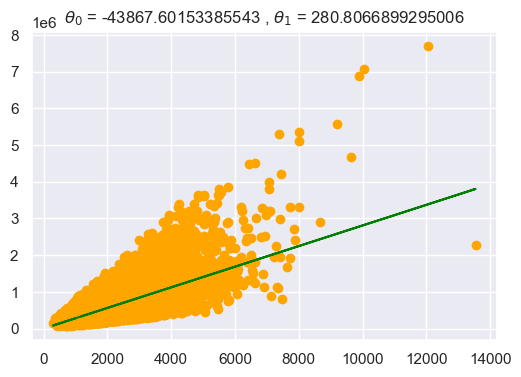

In [51]:
plt.figure(figsize=(6,4))
plt.title('$\\theta_0$ = {} , $\\theta_1$ = {}'.format(intercept, slope))
plt.scatter(xs,y, marker='o', color='Orange')
plt.plot(xs, np.dot(x, slope), 'green')

<a id='6'></a>
#### <font color="Darkblue">**5. `Scikit-Learn` Implementation**</font>


In [63]:
import numpy as np
from sklearn.linear_model import LinearRegression

xsl = x.values.reshape(-1,1)
ysl = y.values.reshape(-1,1)
xsl = np.concatenate((np.ones(len(xsl)).reshape(-1,1), xsl), axis=1)

from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(xsl[:,1].reshape(-1,1), ysl.reshape(-1,1))
y_hat = slr.predict(xsl[:,1].reshape(-1,1))

print('theta[0] = ', slr.intercept_)
print('theta[1] = ', slr.coef_)

thetas = np.array([slr.intercept_, slr.coef_.flatten()]).squeeze()



theta[0] =  [-43867.60153386]
theta[1] =  [[280.80668993]]


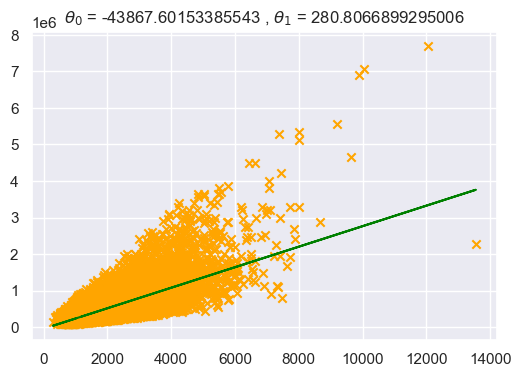

In [65]:
plt.figure(figsize=(6,4))
plt.title('$\\theta_0$ = {} , $\\theta_1$ = {}'.format(thetas[0], thetas[1]))
plt.scatter(xsl[:,1],y, marker='x', color='Orange')
plt.plot(xsl[:,1], np.dot(xsl, thetas), 'green')

<a id='4'></a>
#### 5.1 Implement using Statsmodel

In [68]:
xsm = x.values.reshape(-1,1)
ysm = y.values.reshape(-1,1)
xsm = np.concatenate((np.ones(len(x)).reshape(-1,1), xsm), axis=1)

import statsmodels.api as sm

results = sm.OLS(ysm, xsm).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Sun, 02 Mar 2025   Prob (F-statistic):               0.00
Time:                        16:25:28   Log-Likelihood:            -3.0028e+05
No. Observations:               21613   AIC:                         6.006e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.387e+04   4405.455     -9.958      0.000   -5.25e+04   -3.52e+04
x1           280.8067      1.938    144.924      0.000     277.009     284.605
==============================================================================
Omnibus:                    14815.593   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           543533.863
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.911   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

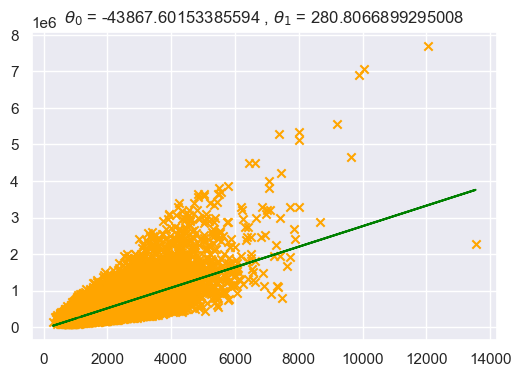

In [70]:
thetas = results.params

plt.figure(figsize=(6,4))
plt.title('$\\theta_0$ = {} , $\\theta_1$ = {}'.format(thetas[0], thetas[1]))
plt.scatter(xsm[:,1],ysm, marker='x', color='Orange')
plt.plot(xsm[:,1], np.dot(xsm, thetas), 'green')

op<a id='7'></a>
## <span style="color:orangered;"><i>III. Multiple Linear Regression</i></span>  
[Top](#top)
)
)


In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dataset = pd.read_csv(r"C:\Users\lenovo\OneDrive\Desktop\DATA SCIENCE\github\Machine learning\1- Linear regression\House_Pricing.csv")
Y = dataset[['price']]
X = dataset.drop(['price', 'id', 'date'],  axis=1)

In [77]:
dataset.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


<a id='8'></a>
#### <font color="Darkblue">**1. Feature Normalization**</font>

In [80]:
x = X.values
y = Y.values

In [82]:
def featureNormalize(x_m):
    mu = np.zeros((1,x_m.shape[1]))
    sigma = np.zeros((1,x_m.shape[1]))
    x_norm = x_m.astype(float)
    
    for i in range(0,len(mu)+1):
        mu[:,i] = x_m[:,i].mean()
        sigma[:,i] = x_m[:,i].std()
        x_norm[:,i] = (x_m[:,i] - mu[:,i])/sigma[:,i]
    return (x_norm, mu, sigma)

In [84]:
# Normalized
x_norm, mu, sigma = featureNormalize(x)
x_norm = np.concatenate((np.ones(len(x_norm)).reshape(-1,1), x_norm), axis=1)

In [86]:
def computeCost_m(x, y, theta):
    m = len(y)
    h_x = np.dot(x, theta)
    j = np.sum(np.square(h_x - y))/(2*m)
    return j

In [88]:
theta_init = np.zeros((19, 1))
computeCost_m(x_norm, Y, theta_init)

C:\Users\lenovo\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


price    2.133728e+11
dtype: float64

<a id='9'></a>
#### <font color="Darkblue">**2. Gradient Descent**</font>

The only difference from univariate regression problem is that now there is one more feature in the matrix X. The hypothesis function and the batch gradient descent update rule remain unchanged.

Note: In the multivariate case, the cost function can also be written in the following vectorized form:

$$J(\theta) = \frac{1}{2m}(X\theta-y)^T(X\theta-y)$$

In [91]:
def gradientDescentMulti(X, Y, theta, alpha, num_iters):
    m = len(Y)
    p = np.copy(X)
    t = np.copy(theta)
    j = []
    print('Running Gradient Descent')
    for i in range(0,num_iters+1):
        cost = computeCost_m(p, Y, t)
        j.append(cost)
        h_x = np.dot(p, t)
        err = h_x - Y
        for f in range(theta.size):
            t[f] = t[f] - alpha/m *(np.sum((np.dot(p[:,f].T, err))))
    return j, t

Running Gradient Descent


C:\Users\lenovo\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\lenovo\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: overflow encountered in square
  result = func(self.values, **kwargs)


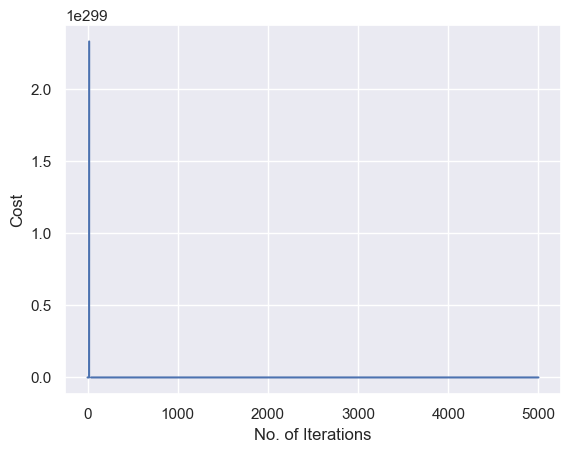

In [93]:
# theta_init = np.zeros((3, 1))
alpha = 0.01
num_iters = 5000
theta_init = np.zeros((19, 1))
cost, theta_final = gradientDescentMulti(x_norm, Y, theta_init, alpha, num_iters)

plt.figure()
plt.plot(cost)
plt.xlabel('No. of Iterations')
plt.ylabel('Cost')
plt.show()

In [95]:
theta_final

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]])

In [97]:
theta_init

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

<a id='10'></a>
#### <font color="Darkblue">**3. Equivalent Code using Scikit-Learn**</font>

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

mlr = LinearRegression()
sc_x = StandardScaler()
X_new = sc_x.fit_transform(x)


In [102]:
mlr.fit(X_new, Y)
y_hat = mlr.predict(X_new)

In [104]:
mlr.score(X_new, Y)

0.6997525539851832

In [106]:
mlr.intercept_

array([540182.15879332])

In [108]:
mlr.coef_

array([[-33293.38347481,  31704.38914977,  81864.1750568 ,
          5318.44667103,   3615.22708376,  50439.8256    ,
         40563.3732507 ,  17187.64873059, 112824.72990705,
         76352.44477173,  27025.10215143, -77027.35886298,
          7962.77753731, -31169.79126633,  83527.76504327,
        -30271.84796611,  14856.09476749, -10442.54308738]])

<a id='11'></a>
#### <font color="Darkblue">**4. SciPy Implementation of Linear Regression (`stats.linregress`)**</font>
#### **Overview**
SciPy's `stats.linregress()` is a quick way to compute **simple linear regression** using the **least squares method**. It is designed for cases where there is only **one independent variable** (i.e., single-feature regression).

#### **How It Works**

1. Takes **X (independent variable)** and **Y (dependent variable)** as **1D arrays**.
2. Computes:
   - **Slope (`theta[1]`)**: The coefficient for the independent variable.
   - **Intercept (`theta[0]`)**: The value of Y when X = 0.
3. Returns additional regression metrics:
   - **`r_value`**: Correlation coefficient (used to compute R²).
   - **`p_value`**: Statistical significance of the slope.
   - **`std_err`**: Standard error of the estimate.r:', std_err) # Estimate error


In [111]:
import numpy as np
import pandas as pd
from scipy import stats

# Extract X (independent variable) and Y (dependent variable) from dataset
X = dataset['sqft_living'].values  # Feature (ensure it's a 1D array)
Y = dataset['price'].values       # Target variable

# Perform Linear Regression using SciPy
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

# Print results
print('theta[0] = ', intercept)  # Intercept term
print('theta[1] = ', slope)      # Slope (coefficient of 'house_size')

# Print additional regression details (optional)
print('R-squared:', r_value**2)  # Goodness of fit
print('p-value:', p_value)       # Statistical significance
print('Standard Error:', std_err)  # Error in estimate


theta[0] =  -43867.60153385543
theta[1] =  280.8066899295006
R-squared: 0.49286538652201395
p-value: 0.0
Standard Error: 1.9376149902337942


<a id='12'></a>
#### <font color="Darkblue">**5. Statsmodels Implementation**</font>
#### Without Feature Scaling/Normalization

##### **Overview**
`statsmodels` provides a powerful way to perform linear regression, similar to SciPy and Scikit-Learn, but with a strong focus on **statistical inference**.

Unlike Scikit-Learn, `statsmodels` provides:
- **Detailed regression summaries** (coefficients, confidence intervals, F-statistics, etc.).
- **p-values and confidence intervals** for each coefficient.
- **ANOVA and hypothesis testing** capabilities.

This example **does not** apply **feature scaling or normalization**, meaning the model works with the raw feature values.

In [114]:
# Define the independent variable (feature) and add a column of ones for the intercept
X = dataset[['sqft_living']]  # Feature
X = sm.add_constant(X)  # Adds a column of ones for the intercept term

# Define the dependent variable (target)
Y = dataset['price']

# Perform Ordinary Least Squares (OLS) Regression
model = sm.OLS(Y, X).fit()

# Print regression summary
print(model.summary())

# Extract theta values
print("theta[0] =", model.params[0])  
print("theta[1] =", model.params[1])  


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Sun, 02 Mar 2025   Prob (F-statistic):               0.00
Time:                        16:26:48   Log-Likelihood:            -3.0028e+05
No. Observations:               21613   AIC:                         6.006e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.387e+04   4405.455     -9.958      

C:\Users\lenovo\AppData\Local\Temp\ipykernel_33772\2334921099.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("theta[0] =", model.params[0])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_33772\2334921099.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("theta[1] =", model.params[1])
